Implementation of c-means

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer

The shape of the original image: (1024, 1024, 3)


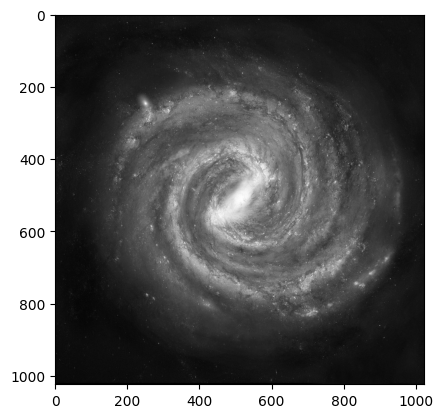

In [2]:
# Load and display the original image
image_original = cv2.imread('/content/milky-way-nvg.jpg')
print(f"The shape of the original image: {image_original.shape}")
plt.imshow(image_original)
plt.show()

In [3]:
# Convert to grayscale
grayscale_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

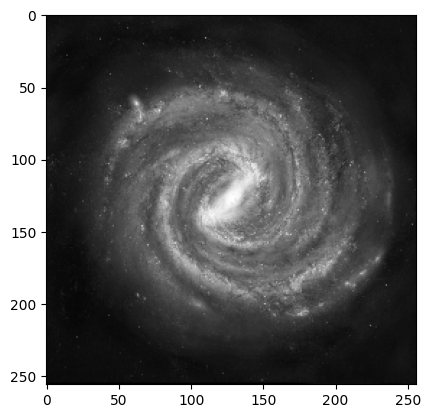

In [4]:
new_size = (256, 256)
image = cv2.resize(grayscale_image, new_size)
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
# Measure Euclidean distance
def euclidean_distance(point, center):
    return np.linalg.norm(point - center)

In [11]:
# C-means Class Implementation
class CMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=5, m=2, max_iter=100, epsilon=0.021544346900318832): # These parameters have been changed after the hyperparameter tuning
        self.n_clusters = n_clusters # number of clusters
        self.m = m # the factor of fuzziness
        self.max_iter = max_iter # the maximum of iteration
        self.epsilon = epsilon
        self.clusters_ = None
        self.membership_matrix_ = None

    def fit(self, X):
        # Normalize and flatten the image data
        new_image = cv2.normalize(X, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        flattened_image = new_image.flatten()

        nb_data = flattened_image.shape[0]

        # Initialization: Create a matrix of membership/clusters
        self.membership_matrix_ = np.random.rand(nb_data, self.n_clusters)
        self.membership_matrix_ /= np.sum(self.membership_matrix_, axis=1, keepdims=True)
        self.clusters_ = np.zeros((self.n_clusters,))

        for k in range(self.max_iter):
            # Calculate the cluster centers
            for j in range(self.n_clusters):
                self.clusters_[j] = np.sum(self.membership_matrix_[:, j] * flattened_image) / np.sum(self.membership_matrix_[:, j])

            # New membership matrix
            new_membership_matrix = np.zeros((nb_data, self.n_clusters))

            for i in range(nb_data):
                for j in range(self.n_clusters):
                    distances = [euclidean_distance(flattened_image[i], self.clusters_[c]) for c in range(self.n_clusters)]
                    new_membership_matrix[i, j] = 1.0 / np.sum([(distances[j] / distances[k]) ** (2 / (self.m - 1)) for k in range(self.n_clusters)])

            # Measure the difference
            diff = np.linalg.norm(self.membership_matrix_ - new_membership_matrix)
            if diff < self.epsilon:
                print(f"Convergence reached after {k} iterations.")
                break

            self.membership_matrix_ = new_membership_matrix

        return self

    def predict(self, X):
        # Convert membership degrees to final segmentation
        return np.argmax(self.membership_matrix_, axis=1)



In [ ]:
def silhouette_scorer(estimator, X, y=None):
    # Since there are no true labels in clustering, we only use X to predict labels.
    labels = estimator.predict(X)
    return silhouette_score(X, labels)

In [ ]:
# Hyperparameter tuning
param_distributions = {
    'n_clusters': [3, 4, 5, 6],  # Number of clusters
    'm': np.linspace(1.1, 2.0, num=10),  # Fuzziness coefficient
    'epsilon': np.logspace(-2, -1, num=10)  # Tolerance for stopping criterion
}

# Prepare the data
X = image.reshape(-1, 1)  # Reshape image data for clustering

# Instantiate the C-means model
cmeans_model = CMeans()

# Perform Random Search with 10 different combinations
random_search = RandomizedSearchCV(cmeans_model, param_distributions, n_iter=2, scoring=silhouette_scorer, cv=3)

# Fit the model to the data
if random_search != None:
  random_search.fit(X)
  # Access the best parameters found
  best_params = random_search.best_params_
  print("Best parameters found:", best_params)
else:
  print("Random search failed")

Convergence reached after 37 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 39 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 33 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 26 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 45 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 27 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 42 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 39 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 43 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 62 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 79 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 24 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 23 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 25 iterations.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "<ipython-input-7-63db20cf7c0e>", line 4, in silhouette_scorer
    return silhouette_score(X, labels)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/loca

Convergence reached after 38 iterations.
Best parameters found: {'n_clusters': 5, 'm': 2.0, 'epsilon': 0.021544346900318832}


In [7]:
best_params = {'n_clusters': 5, 'm': 2.0, 'epsilon': 0.021544346900318832}

Convergence reached after 19 iterations.


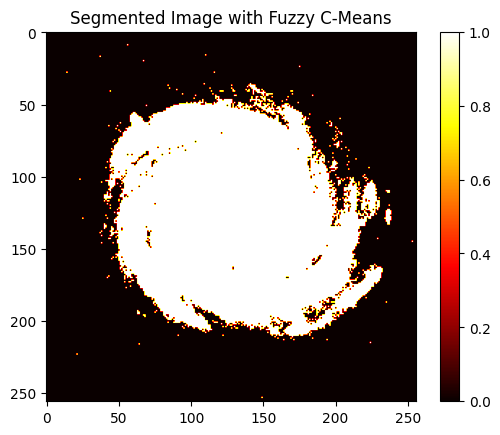

In [10]:
# Change the clusters in the model first

cmeans_model = CMeans()
cmeans_model.fit(image)
segmented_image_labels = cmeans_model.predict(image) # we use the image before the resizing

# Reshape the labels to the original image shape
segmented_image = segmented_image_labels.reshape(image.shape)

# Visualize the segmented image
plt.imshow(segmented_image, cmap='hot')
plt.title('Segmented Image with Fuzzy C-Means')
plt.colorbar()
plt.show()

In [13]:
# With 5 clusters  as proved with a hyperparameter turnner
cmeans_model = CMeans()
cmeans_model.fit(image)
segmented_image_labels = cmeans_model.predict(image) # we use the image before the resizing

# Reshape the labels to the original image shape
segmented_image = segmented_image_labels.reshape(image.shape)

Convergence reached after 37 iterations.


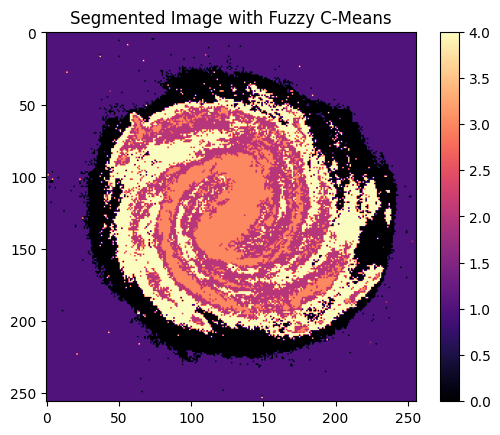

In [14]:
# Visualize the segmented image
plt.imshow(segmented_image, cmap='magma')
plt.title('Segmented Image with Fuzzy C-Means')
plt.colorbar()
plt.show()

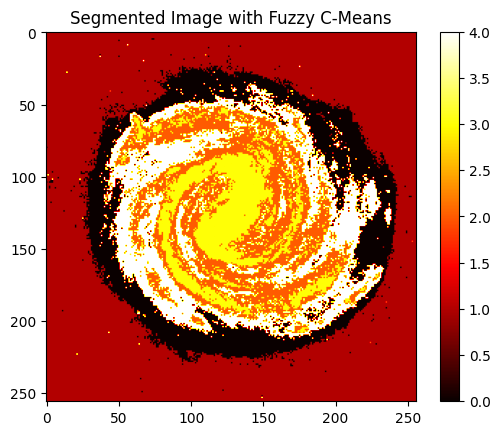

In [15]:
# Visualize the segmented image
plt.imshow(segmented_image, cmap='hot')
plt.title('Segmented Image with Fuzzy C-Means')
plt.colorbar()
plt.show()